<a href="https://colab.research.google.com/github/Bramhaja/data-science---repo/blob/main/Mini_Project_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving students_data.csv to students_data (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Hours        7 non-null      float64
 1   Attendance   7 non-null      int64  
 2   StudyTime    7 non-null      int64  
 3   ParentalEdu  7 non-null      int64  
 4   FinalScore   7 non-null      int64  
dtypes: float64(1), int64(4)
memory usage: 412.0 bytes
None
          Hours  Attendance  StudyTime  ParentalEdu  FinalScore
count  7.000000    7.000000   7.000000     7.000000    7.000000
mean   4.242857   85.857143   1.857143     2.714286   76.428571
std    2.080751   10.188696   0.899735     1.112697   17.027988
min    1.500000   70.000000   1.000000     1.000000   50.000000
25%    2.600000   80.000000   1.000000     2.000000   65.000000
50%    4.500000   88.000000   2.000000     3.000000   82.000000
75%    5.750000   92.500000   2.500000     3.500

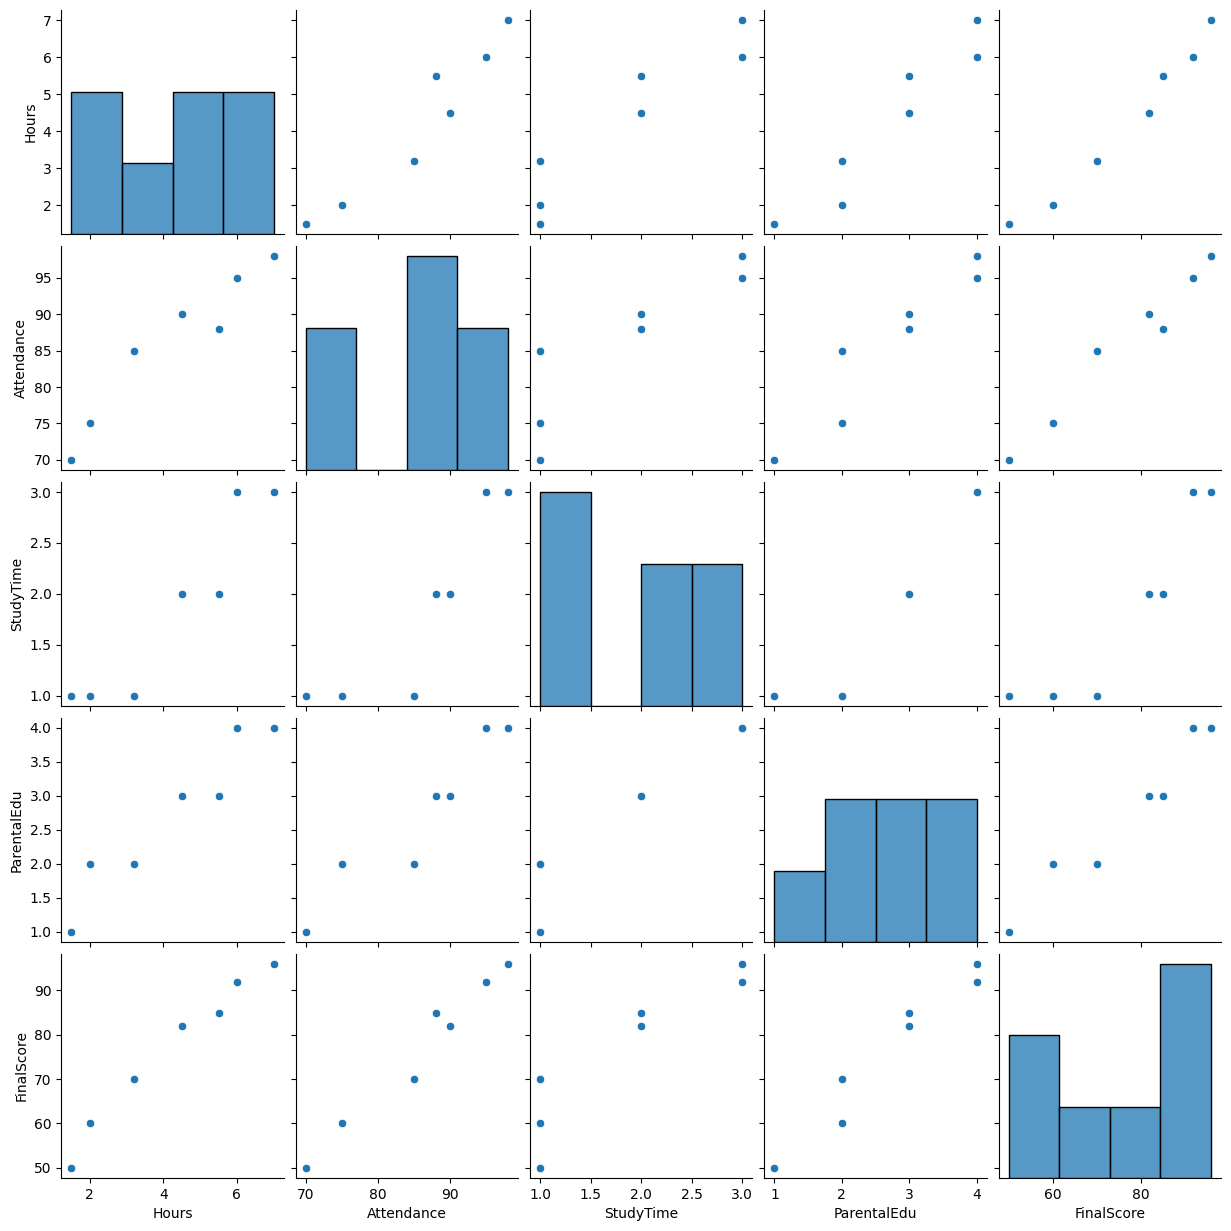

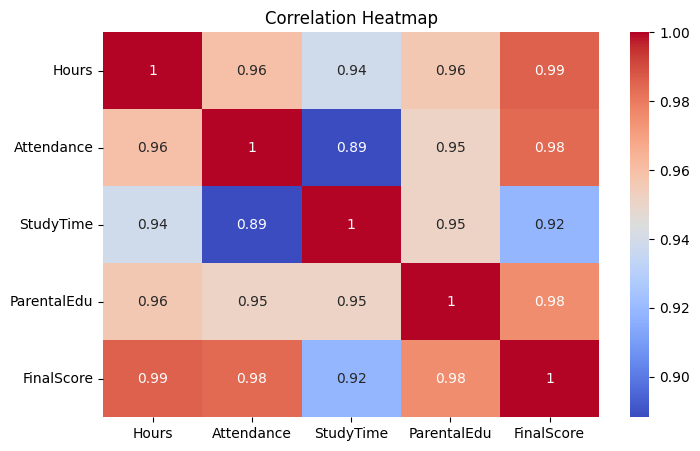

Mean Absolute Error: 14.5
R² Score: -5.180555555555555


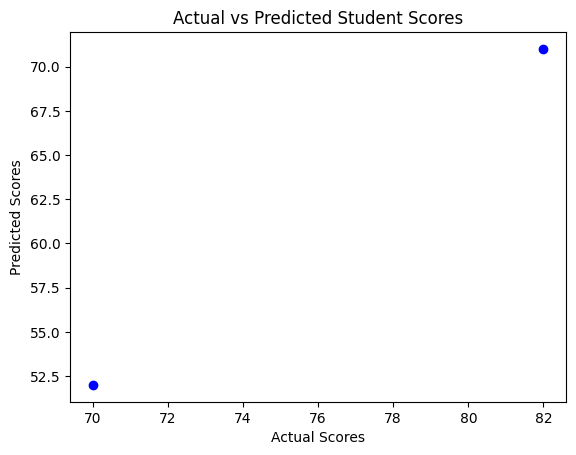

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Step 2: Load Dataset
# You can upload the file manually or use a link
from google.colab import files
uploaded = files.upload()

# After uploading, load the dataset
df = pd.read_csv('students_data.csv')
df.head()

# Step 3: Check data info
print(df.info())
print(df.describe())

# Step 4: Handle missing values
df = df.dropna()

# Step 5: Visualize data
sns.pairplot(df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Step 6: Define Features and Target
X = df[['Hours', 'Attendance', 'StudyTime', 'ParentalEdu']]
y = df['FinalScore']

# Step 7: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Predict and Evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Step 10: Visualize Predictions
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Student Scores")
plt.show()

# Step 11: Save Model
import joblib
joblib.dump(model, 'students_data.pkl')

# Step 12: Save Clean Dataset
df.to_csv('cleaned_student_data.csv', index=False)